<a href="https://colab.research.google.com/github/shiernee/Advanced_ML/blob/main/Week5/WOA7015_Wk5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to WOA7015 Advance Machine Learning Lab - Week 5
This code is generated for the purpose of WOA7015 module.
The code is available in github https://github.com/shiernee/Advanced_ML 


## Now we do a simple SVM model training. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions
import pandas as pd

In [ ]:
# Generate data

# Configuration options
num_samples_total = 150
cluster_centers = [(5,5), (4,3)]
num_classes = len(cluster_centers)

# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, cluster_std = 0.80)
plt.scatter(X[:, 0], X[:, 1], c=y)


In [ ]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X, y)


In [ ]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, X, y,
                               cmap=plt.cm.Blues)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
# Generate predictions
y_pred = svm.predict(X)

# Evaluate by means of accuracy
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy:.4f}')

Model accuracy: 0.9333


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


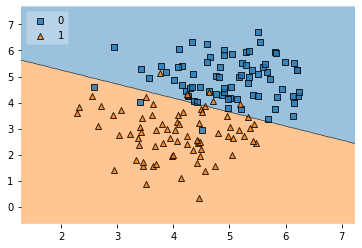

In [ ]:
# Plot decision boundary
plot_decision_regions(X, y, clf=svm, legend=2)
plt.show()

### How do we know if the model is good to predict future data? 
We split the data into training and testing data. 

Testing data serves as a future data. 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/train_test.png" width="300"/>

In [ ]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))

no of training data:  120
no of testing data:  30


In [ ]:
# Create the SVM with linear kernel
svm = SVC(random_state=42, kernel='linear')

# Fit the data to the SVM classifier
svm = svm.fit(X_train, y_train)

# Generate predictions
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

# Evaluate by means of accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Model training accuracy: {train_accuracy:.4f}')
print(f'Model testing accuracy: {test_accuracy:.4f}')

Model training accuracy: 0.9500
Model testing accuracy: 0.8667


In [ ]:
# Plot decision boundary for training data
plot_decision_regions(X_train, y_train, clf=svm, legend=2)
plt.title(f'training acc: {train_accuracy:.4f}')
plt.show()

# Plot decision boundary for testing data
plot_decision_regions(X_test, y_test, clf=svm, legend=2)
plt.title(f'testing acc: {test_accuracy:.4f}')
plt.show()

# To check if the model is really robust. 
# We can do cross validation.

Cross validation is we seperate data into k-fold. Here, we demostrate 5-fold. <br> 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV.png" width="512"/>

<br>

**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_2*. <br>

**At third iteration**, 
*   Use the first 1, 2, 4, 5 set of data for training (blue boxes) and 3rd set of data (white box) as validation.
*    We train the model using training data and test on the validation data. 
*    We will get *validation accuracy_3*. <br>

**Repeat till 5th iteration, we will have 5 validation accuracy. <br>
Average accuracy can be computed to evaluate the model performance.**









In [ ]:
from sklearn.model_selection import KFold
# refer to https://scikit-learn.org/stable/modules/cross_validation.html 

kf = KFold(n_splits=5)
n=1
train_acc, val_acc = [], []

for train_index, test_index in kf.split(X):
  X_train, X_val = X[train_index], X[test_index]
  y_train, y_val = y[train_index], y[test_index]

  print('Fold ', n)
  print('no of training data: ', len(X_train))
  print('no of validation data: ', len(X_val))

  # Create the SVM with linear kernel
  svm = SVC(random_state=42, kernel='linear')

  # Fit the data to the SVM classifier
  svm = svm.fit(X_train, y_train)

  # Generate predictions
  y_pred_train = svm.predict(X_train)
  y_pred_val = svm.predict(X_val)

  # Evaluate by means of accuracy
  train_accuracy = accuracy_score(y_train, y_pred_train)
  val_accuracy = accuracy_score(y_val, y_pred_val)
  print(f'Model training accuracy: {train_accuracy:.4f}')
  print(f'Model testing accuracy: {val_accuracy:.4f}')

  n += 1
  train_acc.append(train_accuracy)
  val_acc.append(val_accuracy)
  print('------------------------------------')

print(f'Validation Accuracy: {np.average(train_acc):.4f} +- {np.std(val_acc):.4f}')


## Hyperparameter Tuning

We know that there are parameters that can be tuned. To determine the best hyperparameter, we use grid_search which uses cross validation concept to determine the best hyperparameter. 


<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/CV_test.png" width="512"/>

<br>

**Split the data into Train, Validation and Test**

**At first iteration**, 
*   Use the first four set of data for training (blue boxes) and last set of data (white box) as validation.
*    We train the model using training data ***using different combination of hyperparameters*** and test on the validation data. 
*    Says we tried 5 hyperparameter combinations, we will have 5 models and 5 validation accuracies. 
*    The model that give the highest validation accuracy will be chosen. 
*    We will get *validation accuracy_1* and a set of *hyperparameter_1*. <br>

**At second iteration**, 
*   Use the first 1, 2, 3, 5 set of data for training (blue boxes) and 4th set of data (white box) as validation.
*    We train the model using training data ***using different combination of hyperparameters*** and test on the validation data. 
*    Says we tried 5 hyperparameter combinations, we will have 5 models and 5 validation accuracies. 
*    We will get *validation accuracy_2* and a set of *hyperparameter_2*. <br>


**Repeat till 5th iteration, we will have 5 validation accuracies. <br>
The set of hyperparameters that gives the highest validation accuracy will be chosen.  <br>
Retrain your model with all of the training + validation data using the best hyperparameter. <br>
Evaluate your final model on test set** 


### We can use GridSearchCV in which it does the procedure we described. 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week5/iris.PNG" width="620"/>

In this example, we use iris data. 
X has four variables. 
1. sepal length in cm 
2. sepal width in cm
3. petal length in cm
4. petal width in cm

y has three outputs. 
*  0 -- Iris Setosa
*  1 -- Iris Versicolour
*  2 -- Iris Virginica





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets

# use iris data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('no of training data: ', len(X_train))
print('no of testing data: ', len(X_test))


no of training data:  120
no of testing data:  30


In [ ]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
clf = GridSearchCV(svc, parameters, cv=4)
clf.fit(X_train, y_train)
results = clf.cv_results_
results = pd.DataFrame.from_dict(results)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001057,0.000186,0.000702,0.000078,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
1,0.000939,0.000069,0.000440,0.000072,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.966667,0.766667,0.933333,0.900000,0.891667,0.075920,6
2,0.000539,0.000015,0.000322,0.000029,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.966667,0.933333,0.966667,0.966667,0.023570,1
3,0.000652,0.000054,0.000355,0.000014,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.933333,0.933333,0.966667,0.958333,0.027639,2
4,0.000598,0.000066,0.000325,0.000039,10,linear,"{'C': 10, 'kernel': 'linear'}",0.966667,0.933333,0.933333,1.000000,0.958333,0.027639,5
5,0.000560,0.000016,0.000333,0.000008,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,0.966667,0.933333,0.966667,0.958333,0.014434,2


In [ ]:
# Retrain the model with the best hyperparameter 
best_param = clf.best_params_
print('best param: ', best_param)
svc.set_params(**best_param)
svc.fit(X_train, y_train)

best param:  {'C': 10, 'kernel': 'linear'}


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Evaluate model performance using test data

# Generate predictions
y_pred = svc.predict(X_test)

# Evaluate by means of accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print('Model CV accuracy: ', results['mean_test_score'].iloc[2])  
print('Model testing accuracy: ', test_accuracy)
print('Parameter used:', best_param)

In [ ]:
# Evaluate by means of a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svc, X_test, y_test,
                              cmap=plt.cm.Blues, 
                               display_labels=iris.target_names)
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

## Your task (10%): Train a SVM model to best classify breast cancer data.

Steps:
1. Load data 
2. 2% - split data into 80% train, 20% test 
3. 2% - train your svm model using only the train data. 
4. 4% - Try at least 10 different hyperparameter using cross validation, obtain the validation accuracies. 
5. 2% - What do you observe? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [8]:
# Load the breast cancer dataset
bc = datasets.load_breast_cancer()
X = pd.DataFrame(data=bc.data)  # 30 features
y = bc.target

In [ ]:
# your code here #

# Submission Instructions
Once you are finished, follow these steps:

Restart the kernel and re-run this notebook from beginning to end by going to Kernel > Restart Kernel and Run All Cells.
If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.
Double check that there is a number next to each code cell and that these numbers are in order.
Then, submit your lab as follows:

Go to File > Print > Save as PDF.
Double check that the entire notebook, from beginning to end, is in this PDF file. Make sure Solution for Exercise 5 are in for marks. 
Upload the PDF to Spectrum. 